### 1st dataset:Linear regression for fuel efficiency

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression #In scikit-learn, the linear_model module provides various classes and functions for linear regression modeling. LinearRegression is a class in scikit-learn that implements the ordinary least squares (OLS) linear regression algorithm
from sklearn import metrics # It includes metrics for classification, regression, clustering, and ranking tasks.  metrics, you gain access to a wide range of evaluation metrics that you can use to assess the quality and performance of your models.
from sklearn.model_selection import train_test_split

In [ ]:
fuel_eff = pd.read_csv('/content/drive/MyDrive/AI 1/auto-mpg.csv') # (We have uploaded this csv file in teams) dataset from Kaggle, uploaded to drive.
fuel_eff

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
data = np.hstack([fuel_eff.values[::2, :7], fuel_eff.values[1::2, :2]]) #hstack: This is a function from the NumPy library that stacks arrays horizontally. :2 part is a slicing operation that selects every second row, starting from the first row. The :7 part selects the first 7 columns of each selected. The 1::2 part is a slicing operation that selects every second row, starting from the second row. The :2 part selects the first 2 columns of each selected row
data

array([[18.0, 8, 307.0, ..., 70, 15.0, 8],
       [18.0, 8, 318.0, ..., 70, 16.0, 8],
       [17.0, 8, 302.0, ..., 70, 15.0, 8],
       ...,
       [27.0, 4, 151.0, ..., 82, 27.0, 4],
       [44.0, 4, 97.0, ..., 82, 32.0, 4],
       [28.0, 4, 120.0, ..., 82, 31.0, 4]], dtype=object)

In [ ]:
target = fuel_eff.values[1::2, 2]
target

array([350.0, 304.0, 429.0, 440.0, 390.0, 340.0, 455.0, 198.0, 200.0,
       97.0, 107.0, 121.0, 360.0, 318.0, 97.0, 113.0, 232.0, 250.0, 232.0,
       400.0, 318.0, 400.0, 258.0, 250.0, 122.0, 79.0, 71.0, 97.0, 113.0,
       97.0, 122.0, 400.0, 351.0, 429.0, 350.0, 70.0, 307.0, 318.0, 121.0,
       96.0, 97.0, 98.0, 350.0, 350.0, 318.0, 400.0, 318.0, 455.0, 225.0,
       232.0, 198.0, 400.0, 360.0, 232.0, 140.0, 70.0, 155.0, 350.0, 68.0,
       114.0, 318.0, 156.0, 198.0, 232.0, 79.0, 71.0, 250.0, 225.0, 350.0,
       302.0, 98.0, 97.0, 83.0, 90.0, 120.0, 79.0, 250.0, 250.0, 350.0,
       351.0, 250.0, 225.0, 262.0, 97.0, 232.0, 134.0, 119.0, 90.0, 115.0,
       121.0, 91.0, 116.0, 98.0, 305.0, 304.0, 225.0, 200.0, 85.0, 90.0,
       225.0, 250.0, 97.0, 97.0, 130.0, 120.0, 168.0, 350.0, 318.0, 111.0,
       122.0, 305.0, 318.0, 250.0, 225.0, 400.0, 400.0, 97.0, 97.0, 98.0,
       97.0, 146.0, 80.0, 98.0, 85.0, 260.0, 302.0, 200.0, 140.0, 232.0,
       200.0, 258.0, 231.0, 318.0, 134.0

In [ ]:
x=data
y=target

In [ ]:
x

array([[18.0, 8, 307.0, ..., 70, 15.0, 8],
       [18.0, 8, 318.0, ..., 70, 16.0, 8],
       [17.0, 8, 302.0, ..., 70, 15.0, 8],
       ...,
       [27.0, 4, 151.0, ..., 82, 27.0, 4],
       [44.0, 4, 97.0, ..., 82, 32.0, 4],
       [28.0, 4, 120.0, ..., 82, 31.0, 4]], dtype=object)

In [ ]:
y

array([350.0, 304.0, 429.0, 440.0, 390.0, 340.0, 455.0, 198.0, 200.0,
       97.0, 107.0, 121.0, 360.0, 318.0, 97.0, 113.0, 232.0, 250.0, 232.0,
       400.0, 318.0, 400.0, 258.0, 250.0, 122.0, 79.0, 71.0, 97.0, 113.0,
       97.0, 122.0, 400.0, 351.0, 429.0, 350.0, 70.0, 307.0, 318.0, 121.0,
       96.0, 97.0, 98.0, 350.0, 350.0, 318.0, 400.0, 318.0, 455.0, 225.0,
       232.0, 198.0, 400.0, 360.0, 232.0, 140.0, 70.0, 155.0, 350.0, 68.0,
       114.0, 318.0, 156.0, 198.0, 232.0, 79.0, 71.0, 250.0, 225.0, 350.0,
       302.0, 98.0, 97.0, 83.0, 90.0, 120.0, 79.0, 250.0, 250.0, 350.0,
       351.0, 250.0, 225.0, 262.0, 97.0, 232.0, 134.0, 119.0, 90.0, 115.0,
       121.0, 91.0, 116.0, 98.0, 305.0, 304.0, 225.0, 200.0, 85.0, 90.0,
       225.0, 250.0, 97.0, 97.0, 130.0, 120.0, 168.0, 350.0, 318.0, 111.0,
       122.0, 305.0, 318.0, 250.0, 225.0, 400.0, 400.0, 97.0, 97.0, 98.0,
       97.0, 146.0, 80.0, 98.0, 85.0, 260.0, 302.0, 200.0, 140.0, 232.0,
       200.0, 258.0, 231.0, 318.0, 134.0

In [ ]:
x.shape

(199, 9)

In [ ]:
y.shape

(199,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3)

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train) # fit the data into data model to make predictions. The x_train parameter represents the input feature data for training, and the y_train parameter represents the corresponding target values or labels.

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

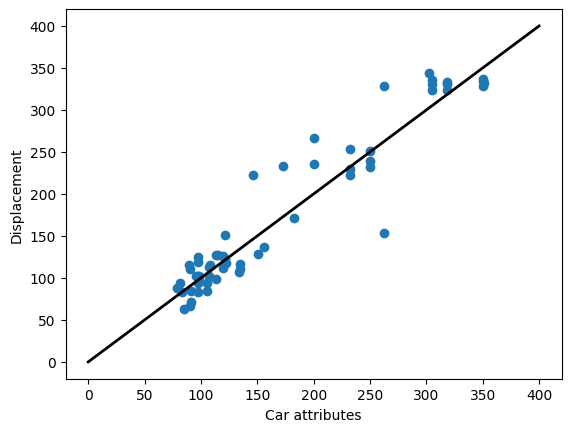

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Car attributes')
values = [0,50,100,150,200,250,300,350,400] # reference line to show how these two amounts ( test and predicted) are different  )
plt.plot(values,values, color='black',linewidth=2)
plt.ylabel('Displacement')
plt.show()

In [ ]:
#Calculation of mean squared error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred) #for evaluating the performance of regression models by comparing y_test and y_pred
mse

784.1208176431242

In [ ]:
new_x = data[:,[1,2]]
new_y = target
new_x_train, new_x_test ,new_y_train, new_y_test = train_test_split(new_x, new_y, test_size = 0.3, random_state=42) # The testing set size is set to 30% of the data, and the random state is set to 42 for reproducibility.
new_reg = LinearRegression()
new_reg.fit(new_x_train, new_y_train)
new_y_predict = new_reg.predict(new_x_test)
new_mse = metrics.mean_squared_error(new_y_test, new_y_predict)
new_mse

4133.59764643811

In [ ]:
sklearn.metrics.r2_score(y_test, y_pred)

0.9008877631884741

------------------------------------------------------------------------------------------------------------------------------------------------------------

### **Linear regression for iris data**

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
x=iris['petal_length']
y=iris['petal_width']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3)

In [ ]:
x_train

57     3.3
39     1.5
72     4.9
23     1.7
79     3.5
      ... 
132    5.6
2      1.3
121    4.9
40     1.3
11     1.6
Name: petal_length, Length: 105, dtype: float64

In [ ]:
x_train=np.array(x_train).reshape(-1,1) #converting the data to two diamentional
x_test=np.array(x_test).reshape(-1,1)

In [ ]:
x_train

array([[3.3],
       [1.5],
       [4.9],
       [1.7],
       [3.5],
       [4.5],
       [1.4],
       [1.4],
       [3.7],
       [5.7],
       [4.8],
       [1.6],
       [4.2],
       [5. ],
       [1.3],
       [3.9],
       [4.4],
       [4.4],
       [1.1],
       [4.8],
       [5.1],
       [4.7],
       [1.2],
       [5.8],
       [5.7],
       [4.5],
       [6.1],
       [1.5],
       [4.7],
       [6.4],
       [5.5],
       [6.6],
       [5.1],
       [1.9],
       [5.3],
       [1.5],
       [4.8],
       [5.1],
       [1.6],
       [6. ],
       [1.4],
       [4. ],
       [4.6],
       [5.3],
       [5.6],
       [5.8],
       [5.6],
       [1.4],
       [3.9],
       [1.4],
       [4.8],
       [4.5],
       [4. ],
       [4.7],
       [3. ],
       [5.1],
       [5.1],
       [4.9],
       [4. ],
       [5.6],
       [1.4],
       [4.7],
       [4.5],
       [1.6],
       [6.3],
       [5. ],
       [5.6],
       [1.9],
       [3.5],
       [4.3],
       [1.3],
      

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

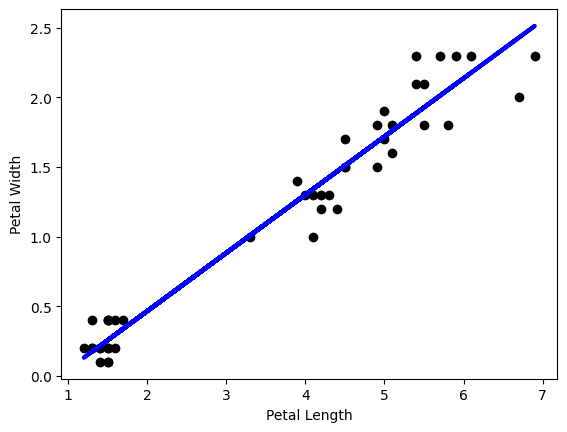

In [ ]:
plt.scatter(x_test, y_test,color="black")
plt.plot(x_test,y_pred, color="blue", linewidth=3)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [ ]:
import sklearn
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)
mse

0.02936797633568326

In [ ]:
sklearn.metrics.r2_score(y_test, y_pred)

0.9504514496436058